Trading return

In [420]:
import numpy as np
import random
import matplotlib.pyplot as plt 

def price_paths(price=100, n=100, v=None):
    if v is None:
        v = random.random()/100
    prices = [price]
    for i in range(1, n+1):
        price *= np.random.normal(1, v)
        prices.append(price)
    return prices

In [421]:
def trading_algo(cash=10000, prices=price_paths()):
    shares = 0
    portfolio_values = [cash]  # Store initial portfolio value

    for i in range(1, len(prices)):
        price_i = prices[i]
        last_price = prices[i-1]
        if price_i > last_price and cash >= price_i:
            shares_to_buy = cash // price_i
            shares += shares_to_buy
            cash -= shares_to_buy * price_i
        elif price_i < last_price and shares > 0:
            cash += shares * price_i
            shares = 0
        portfolio_value = cash + shares * price_i  # Use current price
        portfolio_values.append(portfolio_value)
    
    return portfolio_values

In [422]:
def run_simulation(initial_price=100, n_steps=10000, initial_cash=10000, 
                   volatility=None, save_path='plots/simple_trading.pdf'):
    """
    Run a complete trading simulation and plot results.
    
    Parameters:
    - initial_price: Starting stock price
    - n_steps: Number of time steps
    - initial_cash: Starting cash amount
    - volatility: Price volatility (if None, randomized)
    - save_path: Where to save the plot
    """
    if volatility is None:
        volatility = random.random()/100
    
    # Generate data
    prices = price_paths(price=initial_price, n=n_steps, v=volatility)
    portfolio_values = trading_algo(cash=initial_cash, prices=prices)
    
    # Create plot
    fig, ax1 = plt.subplots(figsize=(18, 6))
    ax1.plot(prices, color="blue", label="Stock Price")
    ax1.set_xlabel("Time Step")
    ax1.set_ylabel("Stock Price", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    
    ax2 = ax1.twinx()
    ax2.plot(portfolio_values, color="red", label="Portfolio Value")
    ax2.set_ylabel("Portfolio Value", color="red")
    ax2.tick_params(axis="y", labelcolor="red")
    
    plt.title("Stock Price and Portfolio Value Over Time")
    fig.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=2)
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    return prices, portfolio_values

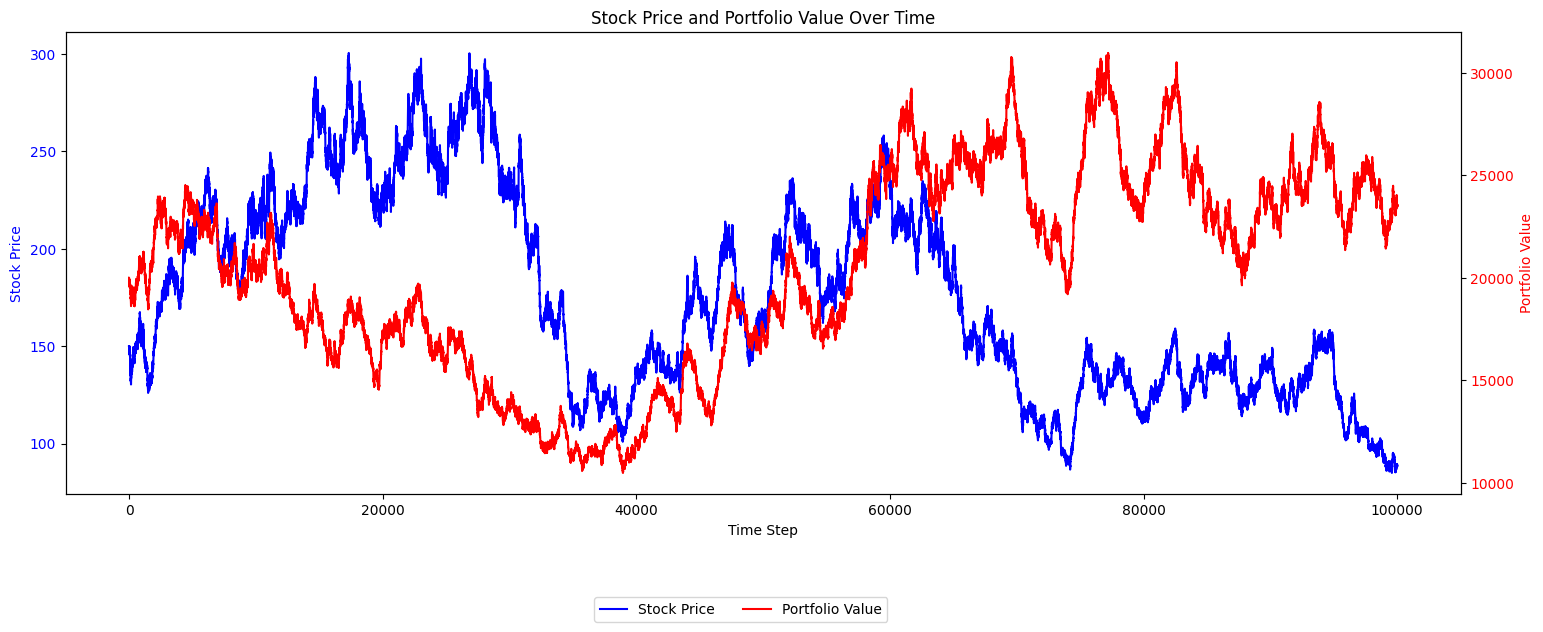

([150,
  150.0050569804274,
  149.0325183630191,
  149.4590624046989,
  148.9660217912464,
  148.7923933697532,
  148.52702579185552,
  147.89033928260355,
  147.41858290973224,
  146.48171223895844,
  146.56030005278674,
  146.32426117418203,
  146.7236309609166,
  146.65007863168532,
  146.3211302252103,
  146.09546278443042,
  146.70639612528933,
  146.64022450146345,
  146.11337949938047,
  147.06881527770602,
  147.12752181407967,
  147.43964043166676,
  147.85395480105336,
  146.98437243087702,
  146.68255146585295,
  147.00758622155286,
  146.39021006603934,
  147.44260680476418,
  148.73069813928777,
  149.19671320923922,
  149.49011479697612,
  149.05754984055636,
  150.06192246869028,
  148.96757574072805,
  149.09282528624618,
  149.1539739800385,
  149.50191358599022,
  148.44546416970485,
  147.68278515951832,
  147.30150054239277,
  147.8728203866298,
  148.94685053908015,
  148.08855367147441,
  148.054643149727,
  147.25725482466984,
  146.65149443430246,
  146.74915235

In [434]:
# run_simulation()
run_simulation(initial_price=150, n_steps=100000, initial_cash=20000)